In [1]:
!pip install --upgrade scikit-learn
#!pip install --upgrade keras
!pip install scikeras
import pandas as pd
import csv
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 106.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
Mounted at /content/drive


In [2]:
inputdata = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Churning/CustomerChurn_dataset.csv')
inputdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

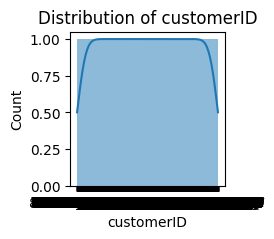

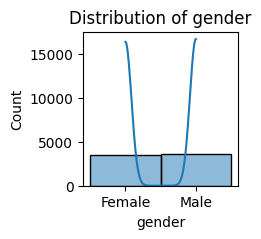

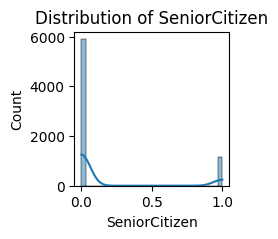

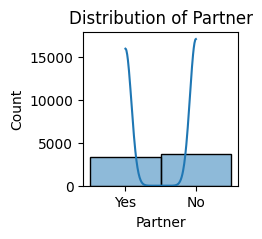

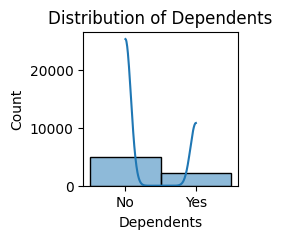

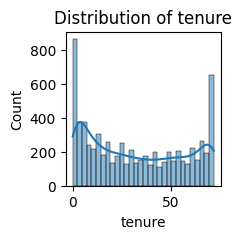

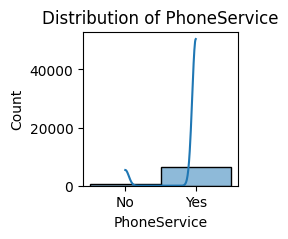

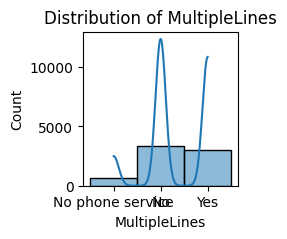

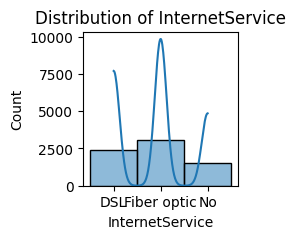

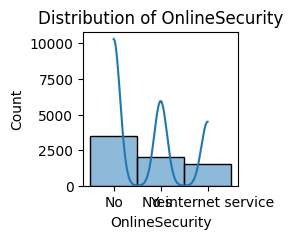

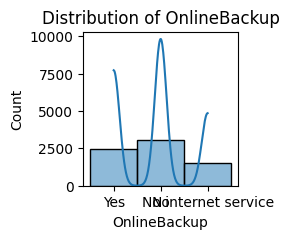

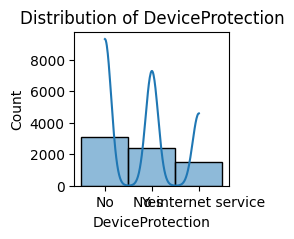

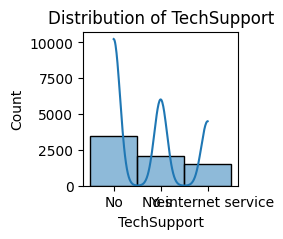

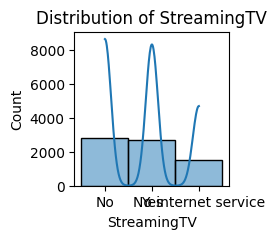

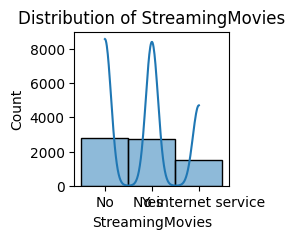

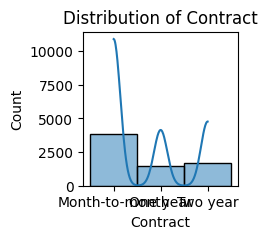

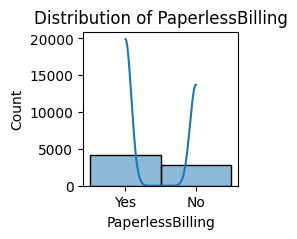

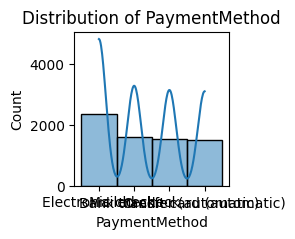

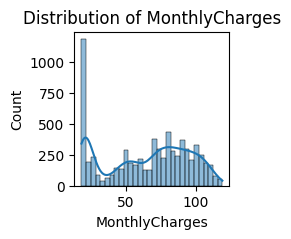

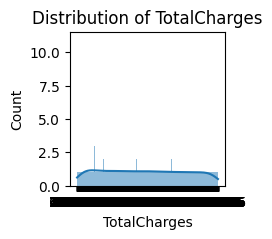

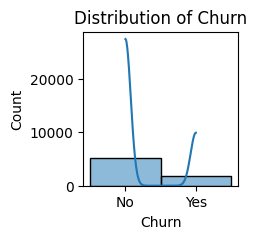

In [5]:
for column in inputdata.columns:
    plt.figure(figsize= (2,2))
    sns.histplot(inputdata[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()
    print()

In [7]:

inputdata

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# for column in inputdata.columns:
#     plt.figure(figsize= (5,5))
#     sns.histplot(inputdata[column], bins=30, kde=True)
#     plt.title(f'Distribution of {column}')
#     plt.show()

In [9]:
num = inputdata.select_dtypes(['int64','float64']).columns
num_data = inputdata[num]
num_data

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70
...,...,...,...
7038,0,24,84.80
7039,0,72,103.20
7040,0,11,29.60
7041,1,4,74.40


# Exploratory Data Aanalysis
Histograms and boxplots for numerical data
Cross tabulation for Categorical data

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
num_data.hist(bins=30, figsize=(5, 5))
plt.show()

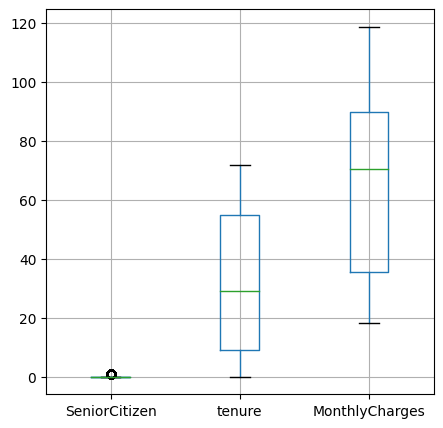

In [11]:
num_data.boxplot(figsize=(5, 5))
plt.show()

In [12]:
cat = inputdata.select_dtypes(include =['object']).columns
cat_data = inputdata[cat]
cat_data

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.5,No
7039,2234-XADUH,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.9,No
7040,4801-JZAZL,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45,No
7041,8361-LTMKD,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,306.6,Yes


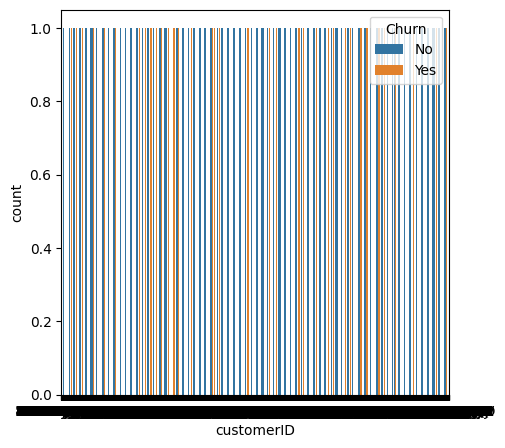

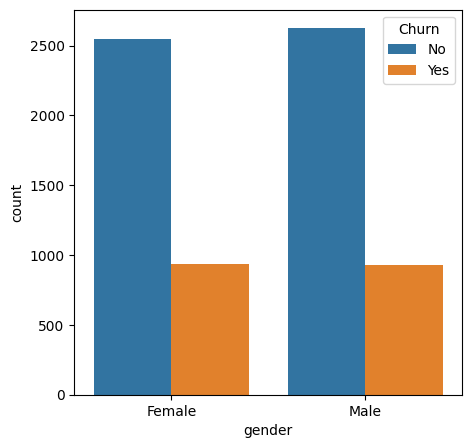

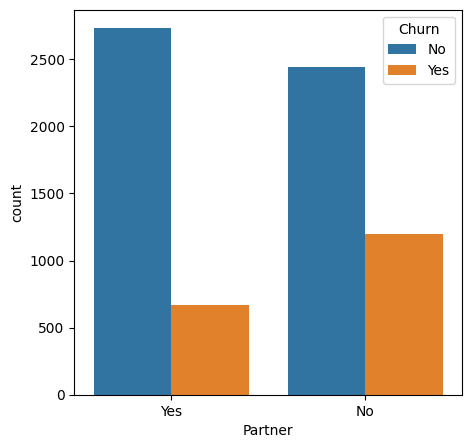

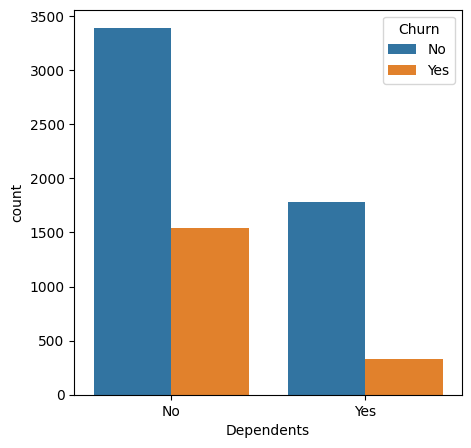

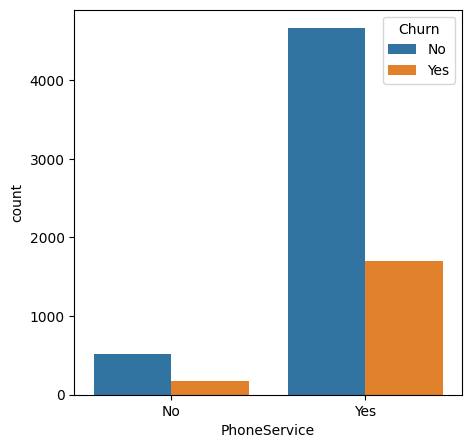

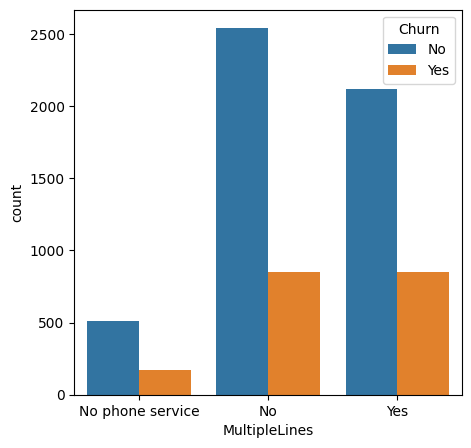

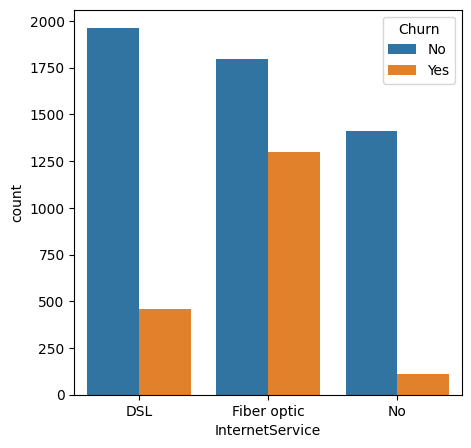

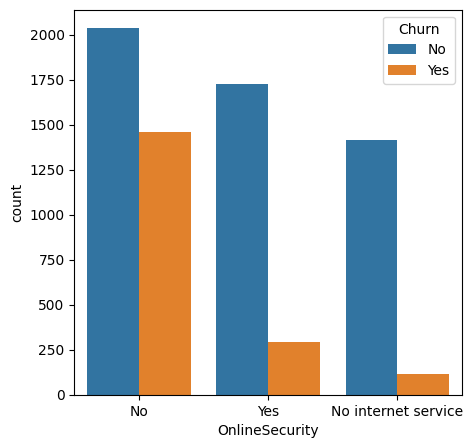

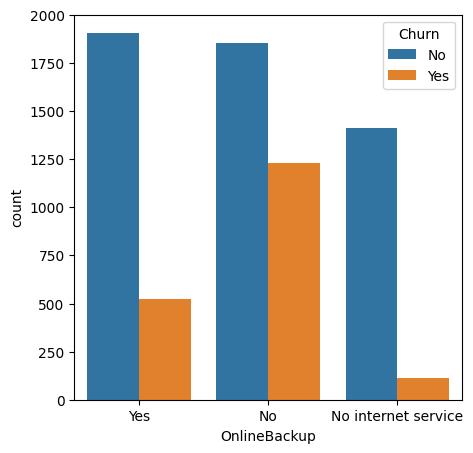

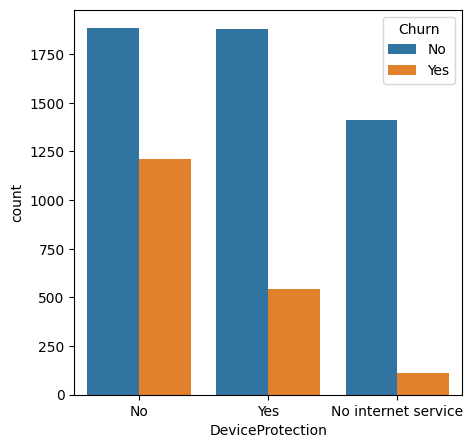

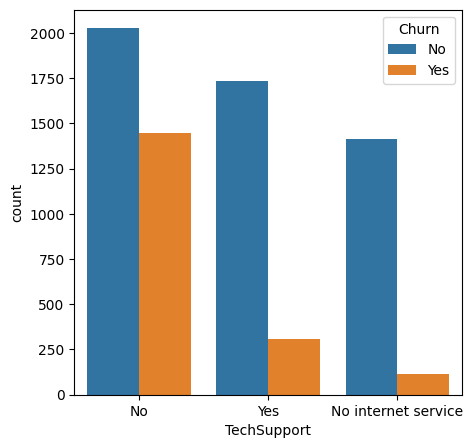

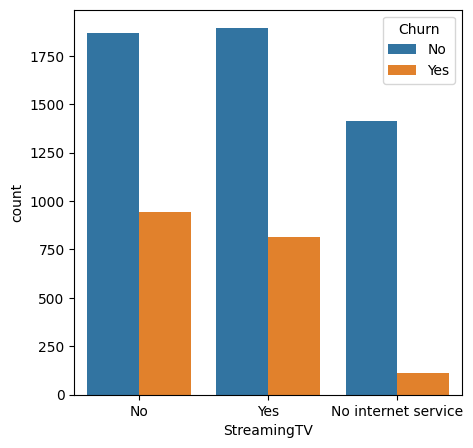

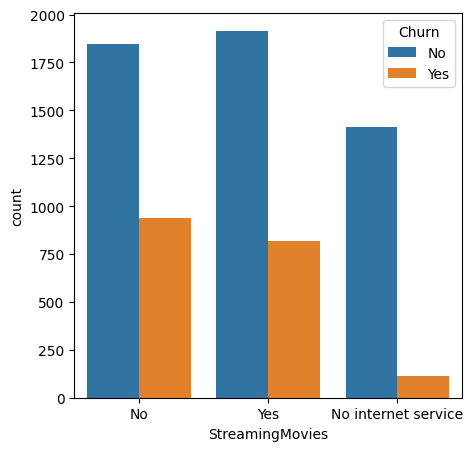

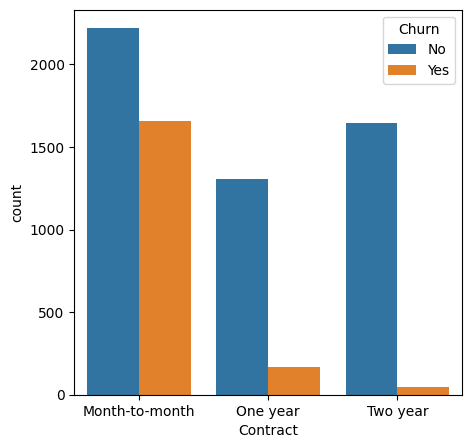

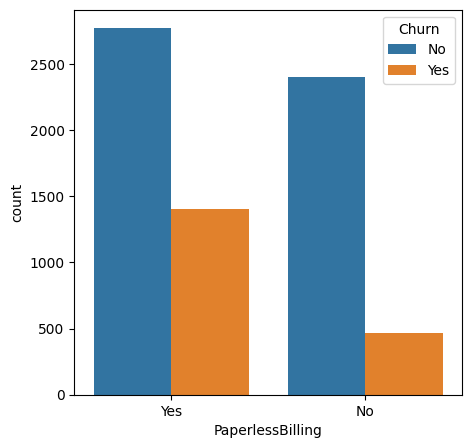

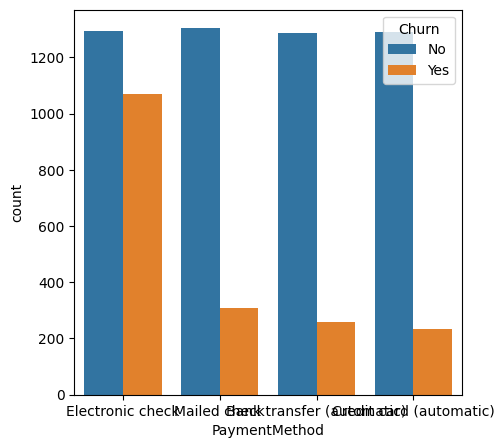

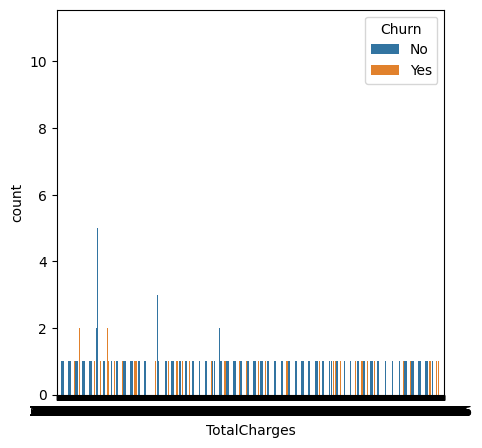

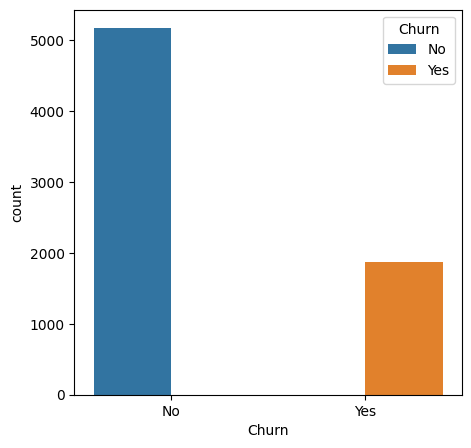

In [13]:
for feature in cat:
    plt.figure(figsize=(5, 5))
    sns.countplot(x=feature, hue='Churn', data=inputdata)
    plt.show()


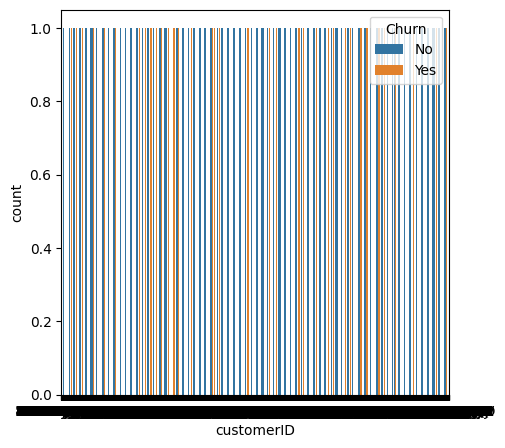

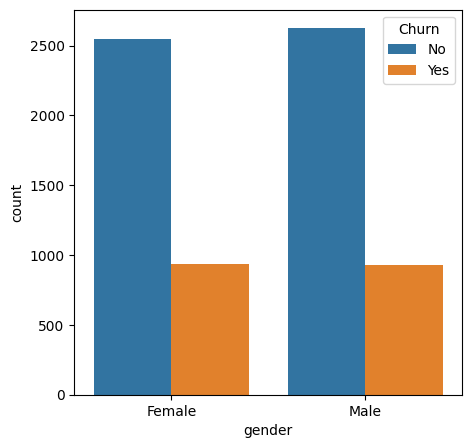

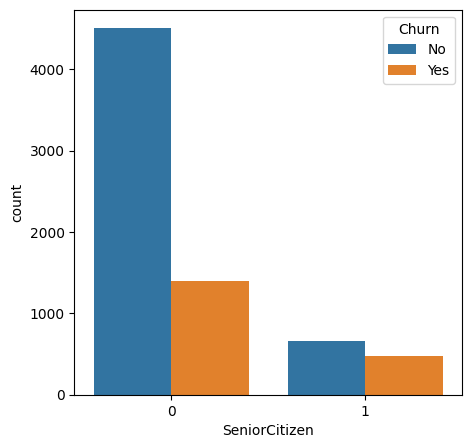

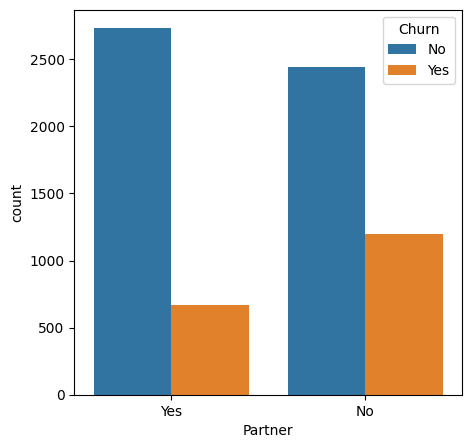

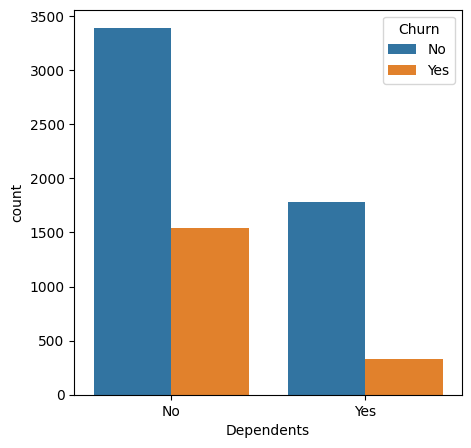

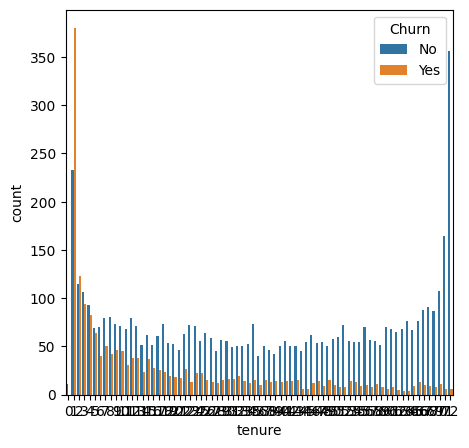

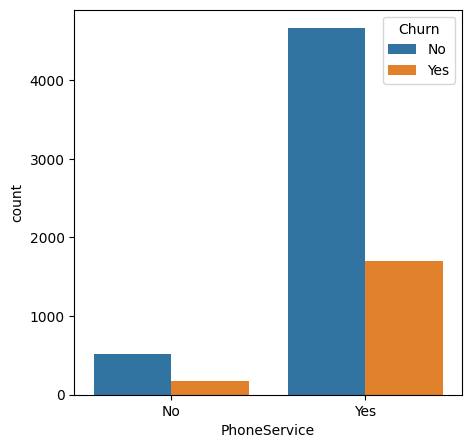

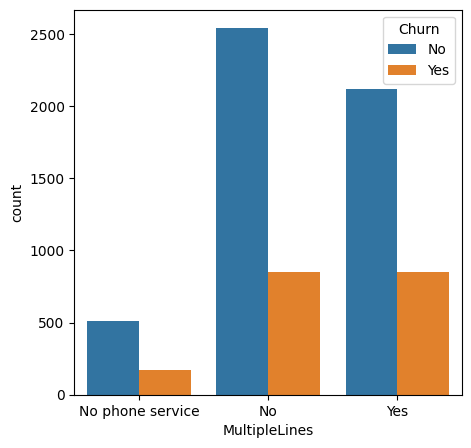

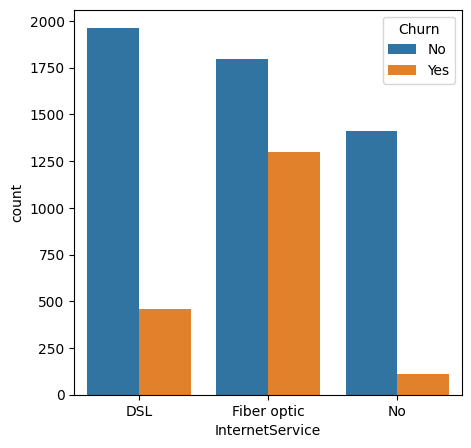

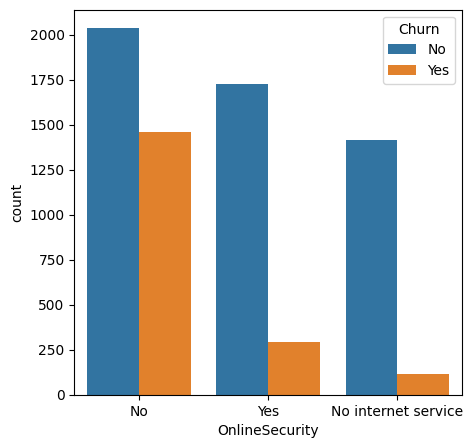

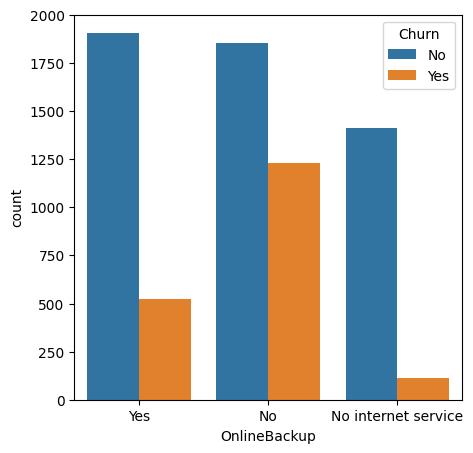

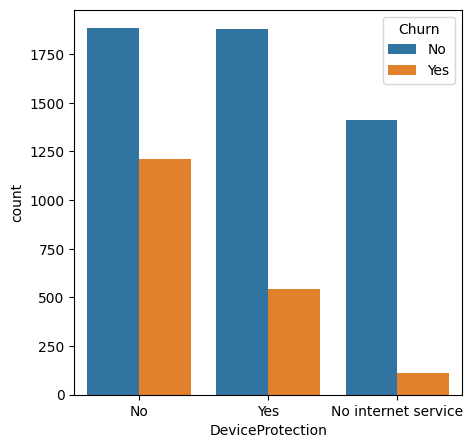

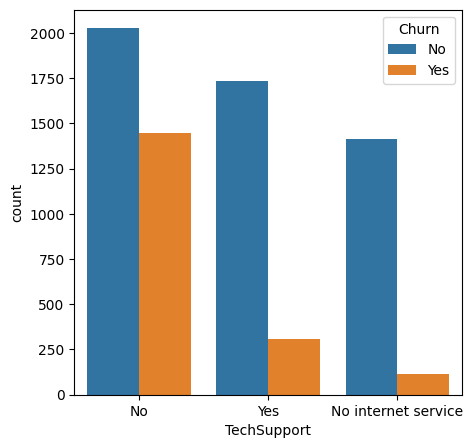

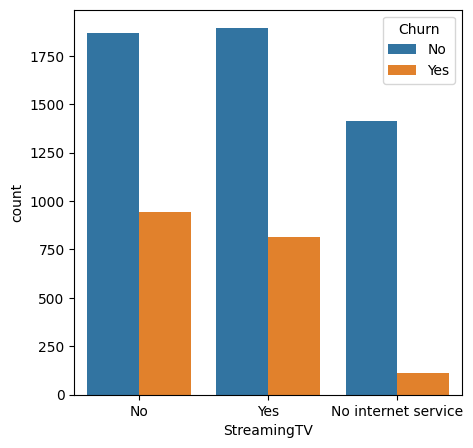

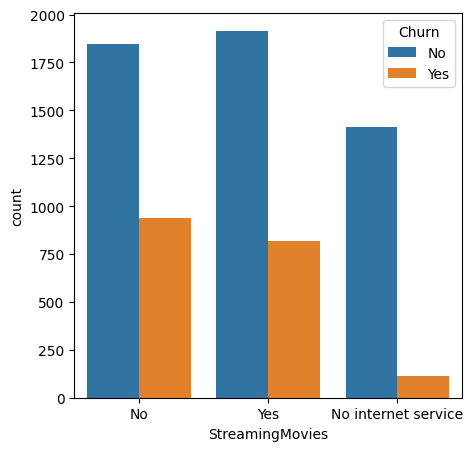

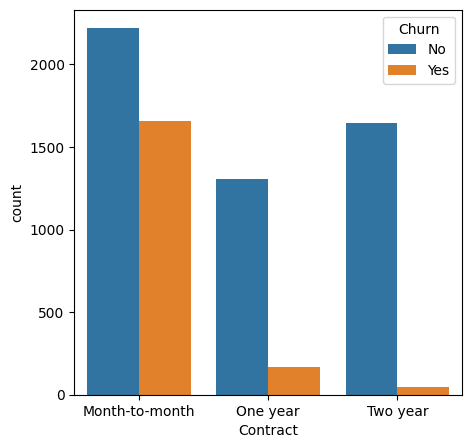

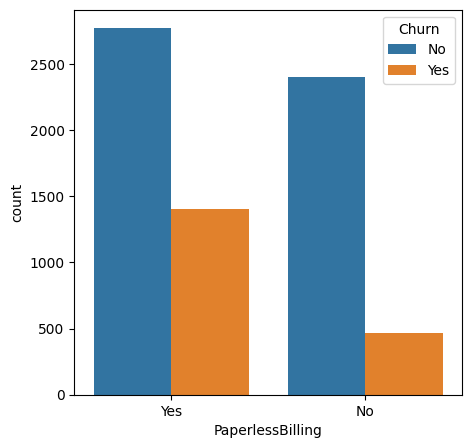

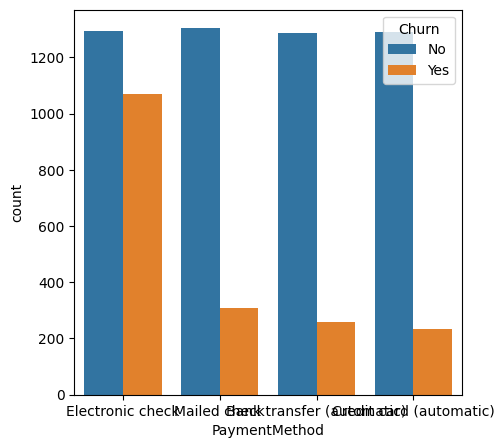

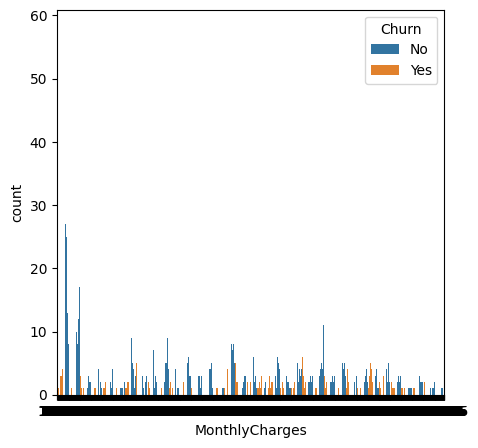

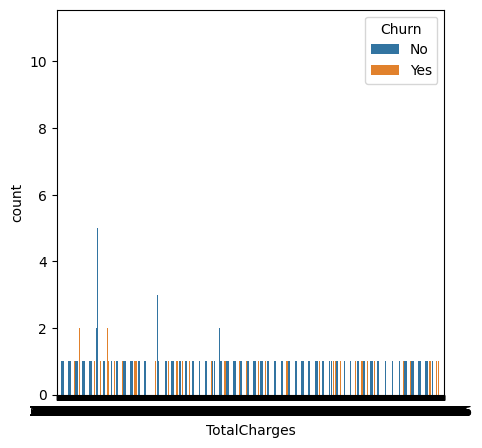

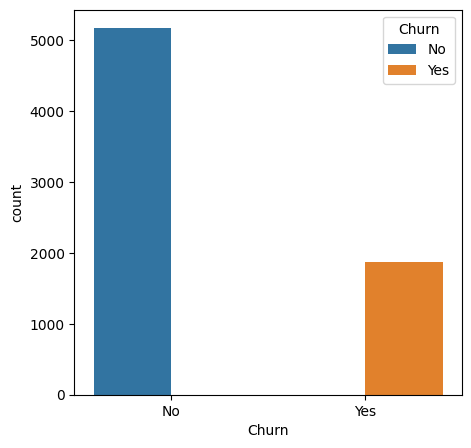

In [14]:
for feature in inputdata.columns:
    plt.figure(figsize=(5, 5))
    sns.countplot(x=feature, hue='Churn', data=inputdata)
    plt.show()


In [15]:
cross_tabs = {}

for col in cat_data.columns:
    cross_tabs[col] = pd.crosstab(cat_data['Churn'], cat_data[col])

for col, cross_tab in cross_tabs.items():
    print(f"Cross-tabulation between churn and {col}:\n")
    print(cross_tab)
    print()

Cross-tabulation between churn and customerID:

customerID  0002-ORFBO  0003-MKNFE  0004-TLHLJ  0011-IGKFF  0013-EXCHZ  \
Churn                                                                    
No                   1           1           0           0           0   
Yes                  0           0           1           1           1   

customerID  0013-MHZWF  0013-SMEOE  0014-BMAQU  0015-UOCOJ  0016-QLJIS  ...  \
Churn                                                                   ...   
No                   1           1           1           1           1  ...   
Yes                  0           0           0           0           0  ...   

customerID  9975-SKRNR  9978-HYCIN  9979-RGMZT  9985-MWVIX  9986-BONCE  \
Churn                                                                    
No                   1           1           1           0           0   
Yes                  0           0           0           1           1   

customerID  9987-LUTYD  9992-RRAMN  9992-

# Encoding categorical data and joining with numerical data

In [16]:
cat_data_fact = cat_data.apply(lambda x: pd.factorize(x)[0])
cat_data_fact

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,1,1,0,1,1,1,0,0,0,1,1,1,1,0
2,2,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,2,1
3,3,1,1,0,0,0,0,1,1,1,1,0,0,1,1,2,3,0
4,4,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,1,0,1,1,2,0,1,1,1,1,1,1,1,0,1,6526,0
7039,7039,0,0,1,1,2,1,0,0,1,0,1,1,1,0,3,6527,0
7040,7040,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,6528,0
7041,7041,1,0,0,1,2,1,0,1,0,0,0,0,0,0,1,6529,1


In [17]:
new_data = pd.concat([num_data, cat_data_fact], axis = 1)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   tenure            7043 non-null   int64  
 2   MonthlyCharges    7043 non-null   float64
 3   customerID        7043 non-null   int64  
 4   gender            7043 non-null   int64  
 5   Partner           7043 non-null   int64  
 6   Dependents        7043 non-null   int64  
 7   PhoneService      7043 non-null   int64  
 8   MultipleLines     7043 non-null   int64  
 9   InternetService   7043 non-null   int64  
 10  OnlineSecurity    7043 non-null   int64  
 11  OnlineBackup      7043 non-null   int64  
 12  DeviceProtection  7043 non-null   int64  
 13  TechSupport       7043 non-null   int64  
 14  StreamingTV       7043 non-null   int64  
 15  StreamingMovies   7043 non-null   int64  
 16  Contract          7043 non-null   int64  


**Creating** dataframes to be used

<ipython-input-19-3886e24f88c2>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X[y == 0][feature], label='Not Churned', shade=True)
<ipython-input-19-3886e24f88c2>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X[y == 1][feature], label='Churned', shade=True)


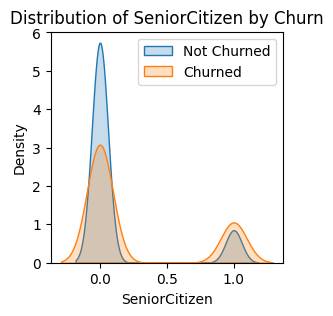

<ipython-input-19-3886e24f88c2>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X[y == 0][feature], label='Not Churned', shade=True)
<ipython-input-19-3886e24f88c2>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X[y == 1][feature], label='Churned', shade=True)


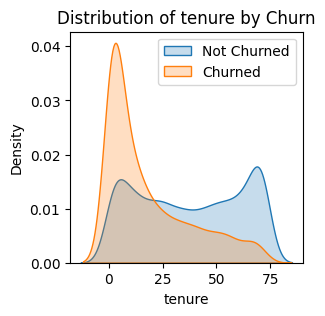

<ipython-input-19-3886e24f88c2>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X[y == 0][feature], label='Not Churned', shade=True)
<ipython-input-19-3886e24f88c2>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X[y == 1][feature], label='Churned', shade=True)


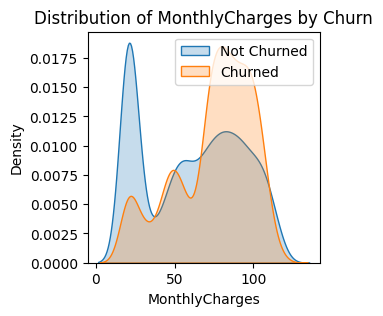

<ipython-input-19-3886e24f88c2>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X[y == 0][feature], label='Not Churned', shade=True)
<ipython-input-19-3886e24f88c2>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X[y == 1][feature], label='Churned', shade=True)


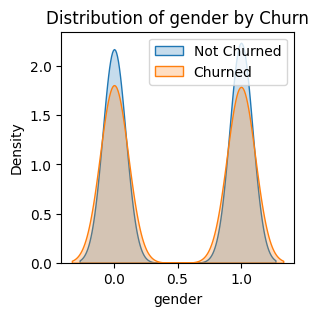

<ipython-input-19-3886e24f88c2>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X[y == 0][feature], label='Not Churned', shade=True)
<ipython-input-19-3886e24f88c2>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X[y == 1][feature], label='Churned', shade=True)


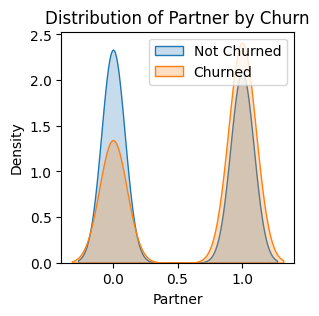

<ipython-input-19-3886e24f88c2>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X[y == 0][feature], label='Not Churned', shade=True)
<ipython-input-19-3886e24f88c2>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X[y == 1][feature], label='Churned', shade=True)


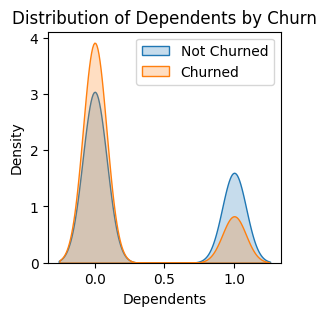

<ipython-input-19-3886e24f88c2>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X[y == 0][feature], label='Not Churned', shade=True)
<ipython-input-19-3886e24f88c2>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X[y == 1][feature], label='Churned', shade=True)


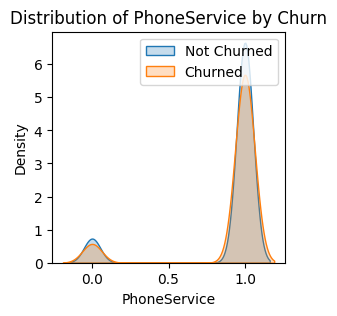

<ipython-input-19-3886e24f88c2>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X[y == 0][feature], label='Not Churned', shade=True)
<ipython-input-19-3886e24f88c2>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X[y == 1][feature], label='Churned', shade=True)


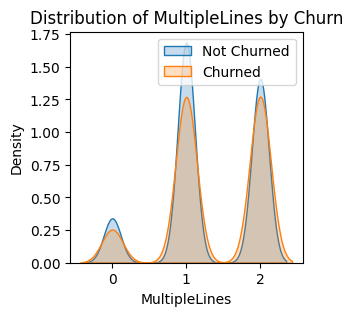

<ipython-input-19-3886e24f88c2>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X[y == 0][feature], label='Not Churned', shade=True)
<ipython-input-19-3886e24f88c2>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X[y == 1][feature], label='Churned', shade=True)


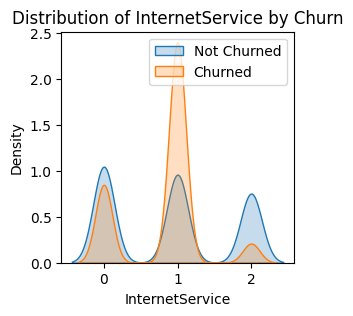

<ipython-input-19-3886e24f88c2>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X[y == 0][feature], label='Not Churned', shade=True)
<ipython-input-19-3886e24f88c2>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X[y == 1][feature], label='Churned', shade=True)


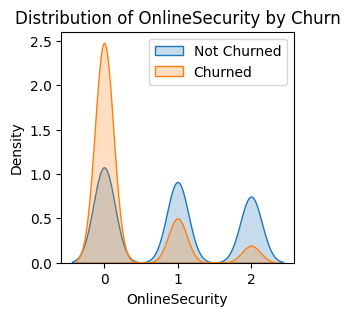

<ipython-input-19-3886e24f88c2>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X[y == 0][feature], label='Not Churned', shade=True)
<ipython-input-19-3886e24f88c2>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X[y == 1][feature], label='Churned', shade=True)


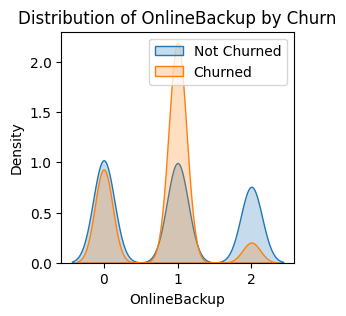

<ipython-input-19-3886e24f88c2>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X[y == 0][feature], label='Not Churned', shade=True)
<ipython-input-19-3886e24f88c2>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X[y == 1][feature], label='Churned', shade=True)


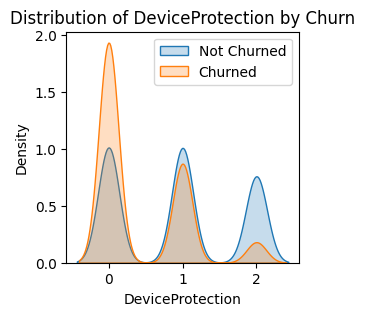

<ipython-input-19-3886e24f88c2>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X[y == 0][feature], label='Not Churned', shade=True)
<ipython-input-19-3886e24f88c2>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X[y == 1][feature], label='Churned', shade=True)


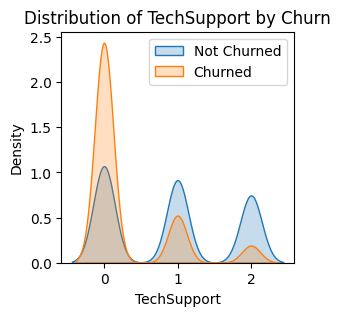

<ipython-input-19-3886e24f88c2>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X[y == 0][feature], label='Not Churned', shade=True)
<ipython-input-19-3886e24f88c2>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X[y == 1][feature], label='Churned', shade=True)


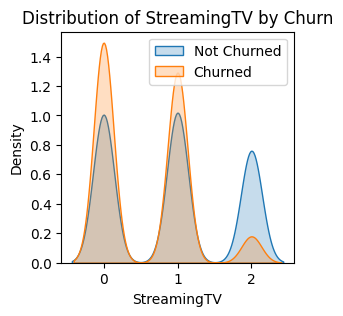

<ipython-input-19-3886e24f88c2>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X[y == 0][feature], label='Not Churned', shade=True)
<ipython-input-19-3886e24f88c2>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X[y == 1][feature], label='Churned', shade=True)


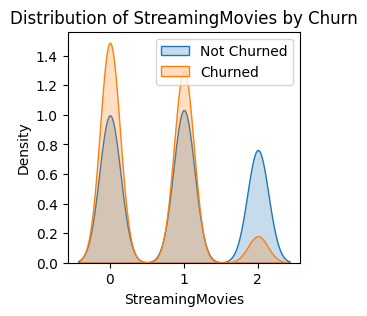

<ipython-input-19-3886e24f88c2>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X[y == 0][feature], label='Not Churned', shade=True)
<ipython-input-19-3886e24f88c2>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X[y == 1][feature], label='Churned', shade=True)


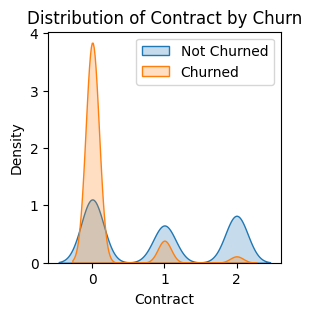

<ipython-input-19-3886e24f88c2>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X[y == 0][feature], label='Not Churned', shade=True)
<ipython-input-19-3886e24f88c2>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X[y == 1][feature], label='Churned', shade=True)


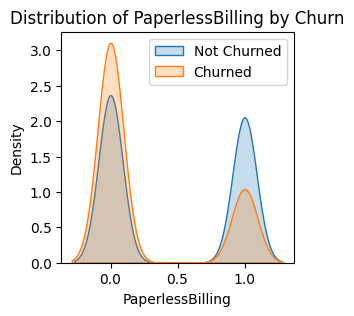

<ipython-input-19-3886e24f88c2>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X[y == 0][feature], label='Not Churned', shade=True)
<ipython-input-19-3886e24f88c2>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X[y == 1][feature], label='Churned', shade=True)


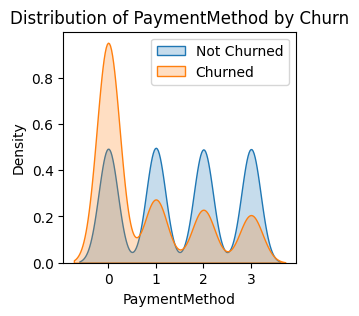

<ipython-input-19-3886e24f88c2>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X[y == 0][feature], label='Not Churned', shade=True)
<ipython-input-19-3886e24f88c2>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X[y == 1][feature], label='Churned', shade=True)


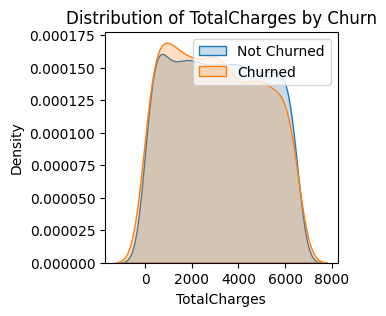

In [19]:
y = new_data['Churn']
X = new_data.drop(['Churn','customerID'], axis=1)
for feature in X.columns:
    plt.figure(figsize= (3,3))
    sns.kdeplot(X[y == 0][feature], label='Not Churned', shade=True)
    sns.kdeplot(X[y == 1][feature], label='Churned', shade=True)
    plt.title(f'Distribution of {feature} by Churn')
    plt.legend()
    plt.show()
    print()

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Selection using SelectKBest

In [27]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression,f_classif
k_best = SelectKBest(score_func=f_classif, k=7)
X_train_scaled = k_best.fit_transform(X_train_scaled, y_train)
X_train_scaled

array([[ 0.88107786, -0.90689226, -0.99342628, ...,  0.23126997,
         0.36642988, -1.1425416 ],
       [-1.28426262, -0.90689226, -0.99342628, ...,  0.23126997,
        -0.83469998, -1.1425416 ],
       [-0.79399685,  1.5992618 ,  1.56606761, ...,  1.54179979,
         0.36642988,  1.46520381],
       ...,
       [-0.83485233,  1.5992618 ,  1.56606761, ...,  1.54179979,
        -0.83469998, -1.1425416 ],
       [-0.83485233, -0.90689226,  0.28632067, ...,  0.23126997,
        -0.83469998, -1.1425416 ],
       [-0.2628756 ,  1.5992618 ,  1.56606761, ...,  1.54179979,
         0.36642988,  1.46520381]])

In [28]:
selected_feature_indices = k_best.get_support(indices=True)
X_train = X_train.iloc[:, selected_feature_indices]
X_test = X_test.iloc[:, selected_feature_indices]
X_train[:20]

,tenure,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,Contract,PaymentMethod
1695,54,0,0,1,1,1,0
1095,1,0,0,0,1,0,0
3889,13,2,2,2,2,1,3
3667,24,0,1,0,1,2,0
2902,6,1,0,0,0,0,0
1630,38,0,1,0,1,0,0
4294,12,1,0,0,1,1,3
1881,26,1,0,0,0,0,2
4710,6,0,1,1,0,2,1
1612,67,0,1,0,0,1,0


In [22]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[-0.43683092,  0.88107786,  0.19592677, ..., -0.84122233,
        -1.1425416 , -0.8101665 ],
       [-0.43683092, -1.28426262,  0.52275463, ..., -0.84122233,
        -1.1425416 , -1.55026965],
       [-0.43683092, -0.79399685, -1.50955058, ...,  1.18874638,
         1.46520381,  0.27856279],
       ...,
       [-0.43683092, -0.83485233, -1.44816666, ..., -0.84122233,
        -1.1425416 ,  0.91497744],
       [ 2.28921522, -0.83485233,  1.14986595, ..., -0.84122233,
        -1.1425416 ,  0.99538893],
       [-0.43683092, -0.2628756 , -1.49296033, ...,  1.18874638,
         1.46520381, -1.23655903]])

EXPLORING RELATIONSHIP BETWEEN EACH COLUMN AND CHURNING

# FUNCTIONAL MODEL CREATION

In [29]:
import tensorflow.keras
from keras.layers import Input, Dense
from keras.models import Model
from keras.utils import plot_model

In [30]:
import keras
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

X_train_scaled, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

def create_model(hidden_layer_size=32, learning_rate=0.001):
    inputs = Input(shape=(X_train_scaled.shape[1],))
    x = Dense(hidden_layer_size, activation="relu")(inputs)
    x = Dense(128, activation="relu")(x)
    z = Dense(64, activation="relu")(x)
    y = Dense(1, activation="sigmoid")(z)
    model = Model(inputs=inputs, outputs=y)
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create KerasClassifier with your model and hyperparameter options
model_wrapper = KerasClassifier(model=create_model, epochs=30, batch_size=32, verbose=0,hidden_layer_size=32,learning_rate=0.001)


# Hyperparameter tuning using GridSearch

In [31]:
param_grid = {
    'hidden_layer_size': [32, 64, 128],
    'learning_rate': [0.001, 0.01, 0.1]
}
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
grid_search = GridSearchCV(estimator=model_wrapper, param_grid=param_grid, cv=3)
grid_result = grid_search.fit(X_train_scaled, y_train)
print(f"Best Parameters: {grid_result.best_params_}")
print(f"Best Accuracy: {grid_result.best_score_}")

Best Parameters: {'hidden_layer_size': 32, 'learning_rate': 0.01}
Best Accuracy: 0.7887885750222331


In [32]:
best_params = grid_result.best_params_

best_model = create_model(hidden_layer_size=best_params['hidden_layer_size'], learning_rate=best_params['learning_rate'])

best_model.summary()

Model: "model_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_29 (InputLayer)       [(None, 7)]               0         
                                                                 
 dense_112 (Dense)           (None, 32)                256       
                                                                 
 dense_113 (Dense)           (None, 128)               4224      
                                                                 
 dense_114 (Dense)           (None, 64)                8256      
                                                                 
 dense_115 (Dense)           (None, 1)                 65        
                                                                 
Total params: 12801 (50.00 KB)
Trainable params: 12801 (50.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


MODEL EVALUATION

In [33]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
best_model.fit(X_train_scaled, y_train, epochs=30, validation_data=(X_val, y_val), callbacks=[early_stopping])
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

Epoch 1/30
124/124 [==============================] - 1s 3ms/step - loss: 0.5427 - accuracy: 0.7541 - val_loss: 0.4429 - val_accuracy: 0.7941
Epoch 2/30
124/124 [==============================] - 0s 2ms/step - loss: 0.4472 - accuracy: 0.7845 - val_loss: 0.4405 - val_accuracy: 0.7941
Epoch 3/30
124/124 [==============================] - 0s 2ms/step - loss: 0.4448 - accuracy: 0.7878 - val_loss: 0.4378 - val_accuracy: 0.7809
Epoch 4/30
124/124 [==============================] - 0s 2ms/step - loss: 0.4404 - accuracy: 0.7913 - val_loss: 0.4354 - val_accuracy: 0.7799
Epoch 5/30
124/124 [==============================] - 0s 2ms/step - loss: 0.4397 - accuracy: 0.7911 - val_loss: 0.4323 - val_accuracy: 0.7850
Epoch 6/30
124/124 [==============================] - 0s 2ms/step - loss: 0.4360 - accuracy: 0.7921 - val_loss: 0.4377 - val_accuracy: 0.7809
Epoch 7/30
124/124 [==============================] - 0s 2ms/step - loss: 0.4391 - accuracy: 0.7885 - val_loss: 0.4312 - val_accuracy: 0.7850
Epoch 

In [34]:
from sklearn.metrics import accuracy_score, roc_auc_score
predictions = best_model.predict(X_test)
predictions_binary = (predictions > 0.5).astype(int)
print('actual')
print(predictions)
# print("Predictions:")
# print(predictions_binary)

67/67 [==============================] - 0s 1ms/step
actual
[[0.7397961 ]
 [0.1064976 ]
 [0.01822933]
 ...
 [0.04461649]
 [0.4150101 ]
 [0.41760343]]


In [36]:
print(predictions[0][0]*100)

73.97961020469666


In [35]:
accuracy = accuracy_score(y_test, predictions_binary)
auc_score = roc_auc_score(y_test, predictions)
print(f'Accuracy: {accuracy}')
print(f'AUC Score: {auc_score}')

Accuracy: 0.7747278750591576
AUC Score: 0.8343725166574976


In [37]:
from joblib import dump, load
with open('/content/drive/My Drive/Colab Notebooks/Churning/churnmodel.joblib','wb') as f:
  dump(best_model,f)